In [1]:
import pandas as pd

In [2]:
cols = ['Sex','Length','Diameter','Height','Whole weight',
        'Shucked weight','Viscera weight','Shell weight',
        'Rings']

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=cols)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

### Separate the input and output data

In [6]:
x = df.drop('Rings', axis = 1)
y = df['Rings']

In [7]:
len(set(y))

28

/home/mitu/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.16.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


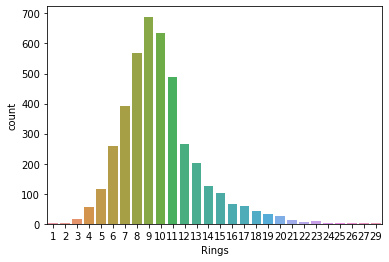

In [8]:
import seaborn as sns
sns.countplot(x=y);

In [9]:
y.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [10]:
x.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [11]:
#pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chatterbot 1.0.5 requires python-dateutil<2.8,>=2.7, but you have python-dateutil 2.8.2 which is incompatible.
chatterbot 1.0.5 requires pyyaml<5.2,>=5.1, but you have pyyaml 6.0 which is incompatible.
chatterbot 1.0.5 requires spacy<2.2,>=2.1, but you have spacy 3.4.1 which is incompatible.
chatterbot 1.0.5 requires sqlalchemy<1.3,>=1.2, but you have sqlalchemy 2.0.0 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.25.3 which is incompatible.
--- Logging error

In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
ros = RandomOverSampler(random_state=0)

In [14]:
x_res, y_res = ros.fit_resample(x, y)

In [15]:
x_res.shape

(19292, 8)

In [16]:
y_res.value_counts()

15    689
14    689
1     689
17    689
2     689
18    689
3     689
19    689
4     689
20    689
5     689
21    689
6     689
22    689
7     689
23    689
8     689
24    689
9     689
25    689
10    689
26    689
11    689
27    689
12    689
13    689
29    689
16    689
Name: Rings, dtype: int64

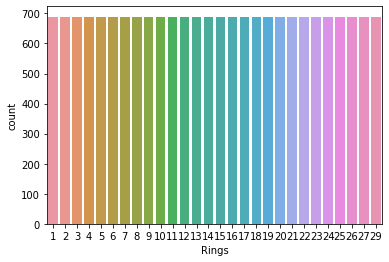

In [17]:
sns.countplot(x=y_res);

### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_res['Sex'] = le.fit_transform(x_res['Sex'])

In [19]:
x_res['Sex'].value_counts()

0    7076
2    6679
1    5537
Name: Sex, dtype: int64

In [20]:
le.classes_

array(['F', 'I', 'M'], dtype=object)

### Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
x_scaled = scaler.fit_transform(x_res, y_res)

In [24]:
pd.DataFrame(x_scaled, columns=x.columns).describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000
mean,0.489711,0.587203,0.580548,0.127104,0.330468,0.237105,0.246077,0.297742
std,0.422079,0.243847,0.250860,0.053347,0.222544,0.162062,0.165354,0.210349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.486486,0.470588,0.097345,0.137197,0.105582,0.106649,0.115595
50%,0.500000,0.662162,0.663866,0.141593,0.345759,0.246133,0.249506,0.297459
75%,1.000000,0.770270,0.756303,0.163717,0.497255,0.348689,0.373272,0.456901
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Cross-Validation

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y_res, random_state=0, test_size=0.25)

In [27]:
x_train.shape

(14469, 8)

In [28]:
x_test.shape

(4823, 8)

### Build the classification machine learning model

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier(random_state=0)

In [31]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Performance Evaluation

In [33]:
y_pred = dt.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.8847190545303752

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00       165
           3       0.99      1.00      1.00       164
           4       0.99      1.00      0.99       170
           5       0.91      0.99      0.95       177
           6       0.82      0.83      0.83       186
           7       0.69      0.76      0.72       168
           8       0.46      0.36      0.41       183
           9       0.22      0.17      0.19       150
          10       0.38      0.30      0.33       159
          11       0.63      0.55      0.59       173
          12       0.79      0.81      0.80       172
          13       0.77      0.93      0.84       177
          14       0.90      0.96      0.93       162
          15       0.91      1.00      0.95       155
          16       0.93      1.00      0.96       166
          17       0.98      1.00      0.99       188
          18       0.98    

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
new1 = [[2, 0.440, 0.365, 0.125, 0.5160, 0.2155, 0.1140, 0.155]]

In [40]:
new1 = scaler.transform(new1)

In [41]:
new1

array([[1.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462]])

In [42]:
dt.predict(new1)

array([10])

### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
regressor = LinearRegression()

In [49]:
regressor.fit(x_train, y_train)

LinearRegression()

### Performance Evaluation

In [51]:
y_pred = regressor.predict(x_test)

In [52]:
y_pred

array([ 1.66868576, 15.46978159, 26.67783678, ..., 25.31872197,
       13.30282795, 18.80498081])

In [53]:
result = pd.DataFrame({
    'actual': y_test,
    'Predicted': y_pred
})

In [54]:
result

,actual,Predicted
5165,2,1.668686
10529,15,15.469782
10966,16,26.677837
14418,21,18.956115
16095,24,26.472489
...,...,...
13938,21,18.956115
11044,16,13.637532
18333,27,25.318722
9816,14,13.302828


### Mean Absolute Error

In [60]:
sum(abs(y_test - y_pred)) / len(y_test)

2.5652733776061294

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.5652733776061254

In [62]:
import numpy as np

In [72]:
sum(abs((y_test - y_pred) / y_test))/len(y_test)*100

22.258517643891246

In [67]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred) * 100

22.25851764389127

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

11.562352730165339

In [75]:
sum((y_test - y_pred)**2) / len(y_test)

11.562352730165287

In [76]:
# RMSE
np.sqrt(sum((y_test - y_pred)**2) / len(y_test))

3.4003459721277314

In [77]:
# R2 Score, Coefficient of Determination, Linearity measurement
regressor.score(x_train, y_train)

0.8202335893377498

In [78]:
new1 = [[2, 0.440, 0.365, 0.125, 0.5160, 0.2155, 0.1140, 0.155]]

In [79]:
new1 = scaler.transform(new1)

In [80]:
regressor.predict(new1)

array([12.67694261])

In [81]:
result = pd.DataFrame({
    'actual': y_test,
    'classifier': dt.predict(x_test),
    'regressor': regressor.predict(x_test)
})

In [ ]:
result